In [51]:
# Importa as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importa os módulos customizados
import sys
sys.path.append('../src') # Adiciona o diretório src ao Python path
from data_loader import DataLoader
from preprocessor import DataPreprocessor

# Define o estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

--- 1. Carregamento e Exploração Inicial dos Dados ---
Dataset carregado de ../content/sample_data/diabetes.csv. Shape: (768, 9)

Informações sobre o Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Primeiras 5 linhas:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insul

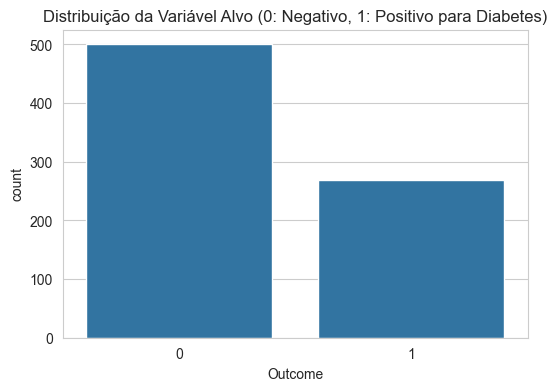

In [52]:
print("--- 1. Carregamento e Exploração Inicial dos Dados ---" )

filepath = r"../content/sample_data/diabetes.csv"

loader = DataLoader()
df = loader.load_from_csv(filepath, target_column='Outcome')
loader.get_info()

# Visualiza a distribuição da variável alvo Y
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribuição da Variável Alvo (0: Negativo, 1: Positivo para Diabetes)')
plt.show()


In [62]:
# primeiras 5 linhas com colunas
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
#visualizar todos os campos numéricos.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

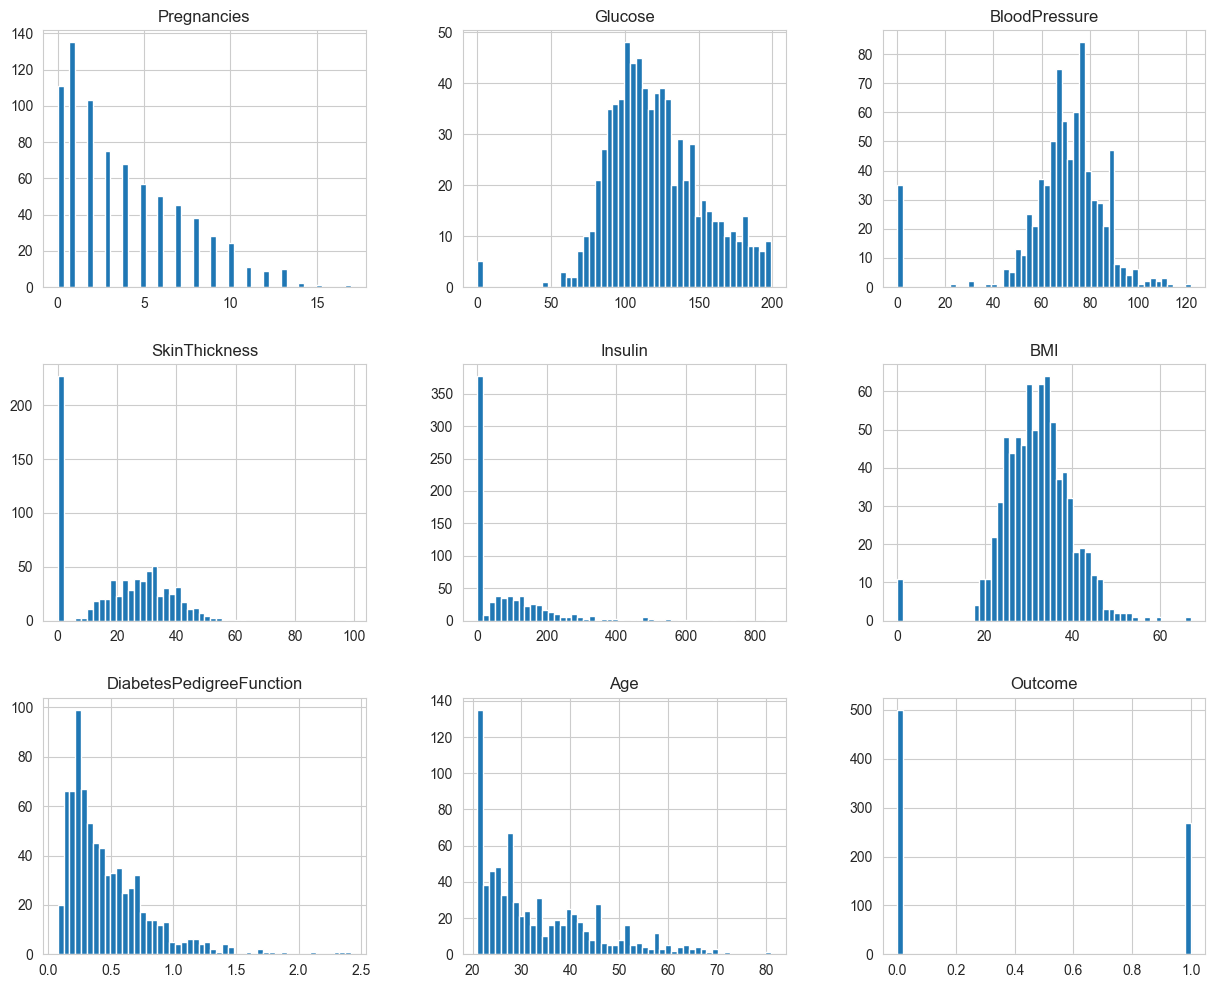

In [55]:

# Histograma

# eixo X mostra os valores da dimensao e Y quantidade de vezes em proporção grafica
df.hist(bins=50, figsize=(15,12))



In [56]:
print("Valores nulos antes da limpeza:")
print(df.isnull().sum())

Valores nulos antes da limpeza:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [57]:
zeros_por_coluna = (df == 0).sum()

print(zeros_por_coluna)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [58]:
print("--- 2. Limpeza dos Dados: Tratando Zeros ---")

preprocessor = DataPreprocessor()

# Colunas onde o valor zero é considerado como um sem o respectivo resultado do exame ou a pessoa não realizou o exame
# Na pipeline a frente iremos aplicar a tecnica da media nessas colunas onde possuir valores nulos
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# setando nulo nos valores zerados -> Apenas para as colunas de nosso interesse
df_cleaned = preprocessor.handle_zero_as_nan(df, columns_to_clean)


--- 2. Limpeza dos Dados: Tratando Zeros ---
Valores '0' substituídos por NaN nas colunas: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [59]:
print("Valores nulos após a limpeza:")
print(df_cleaned.isnull().sum())

Valores nulos após a limpeza:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


--- 3. Análise Exploratória dos Dados (Pós-Limpeza) ---


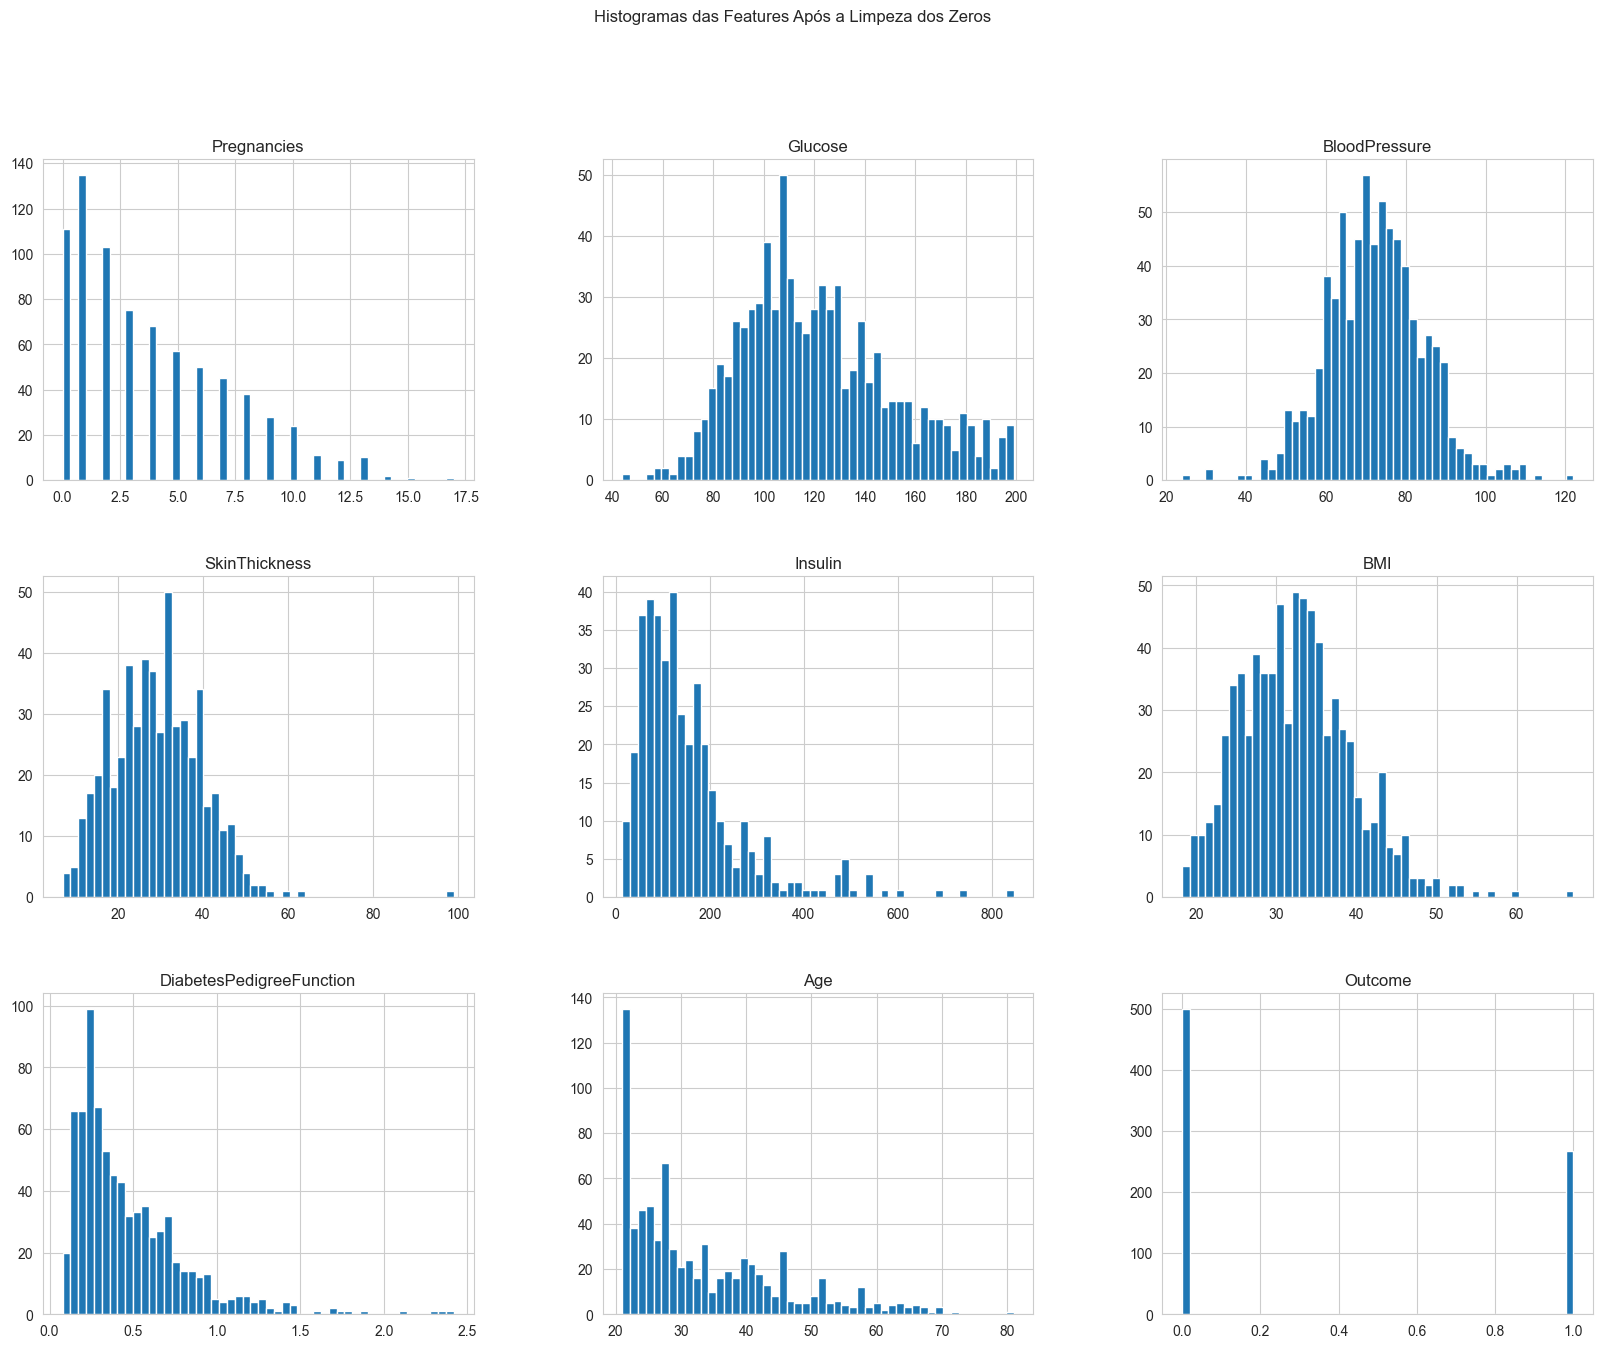

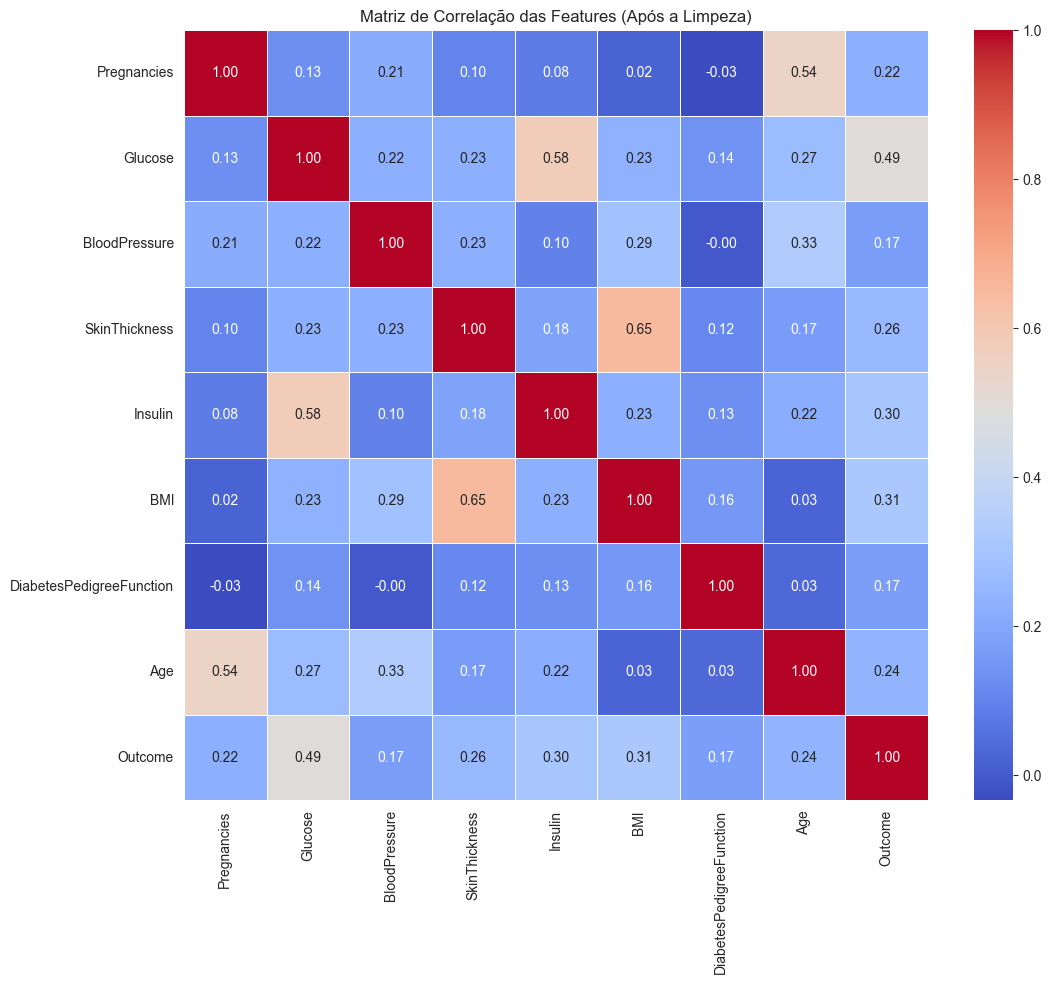

In [60]:
print("--- 3. Análise Exploratória dos Dados (Pós-Limpeza) ---")

# Histogramas dos dados limpos
df_cleaned.hist(bins=50, figsize=(20,15))
plt.suptitle('Histogramas das Features Após a Limpeza dos Zeros')
plt.show()

# Matriz de correlação com os dados limpos
plt.figure(figsize=(12, 10))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Features (Após a Limpeza)')
plt.show()

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>],
       [<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel=

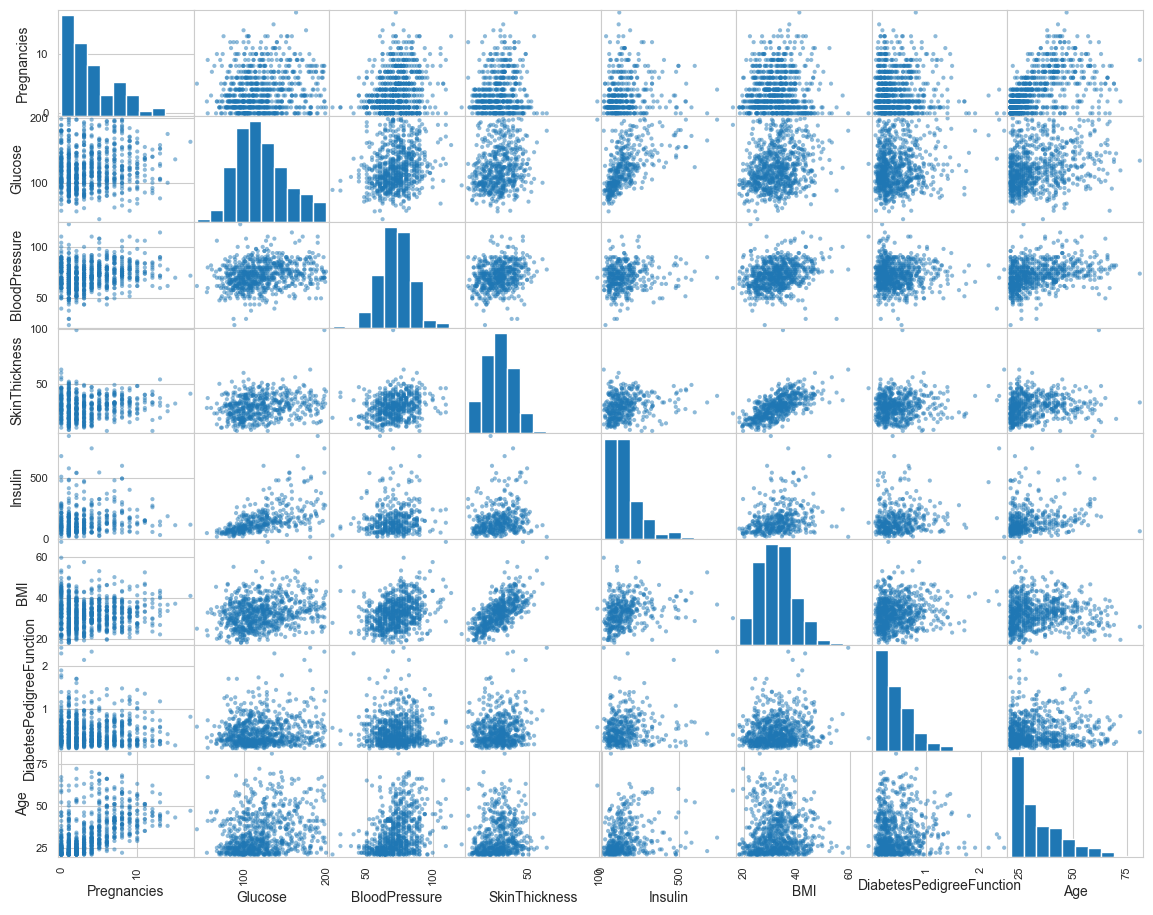

In [61]:

# Nesse exemplo deixamos o Outcome de fora
attributes = ["Pregnancies", "Glucose", "BloodPressure",
              "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Relação entre as variáveis dop pacote - scatter_matrix do "pandas.plotting"
scatter_matrix(df_cleaned[attributes], figsize=(14, 11))
